(29,)
(29, 4)


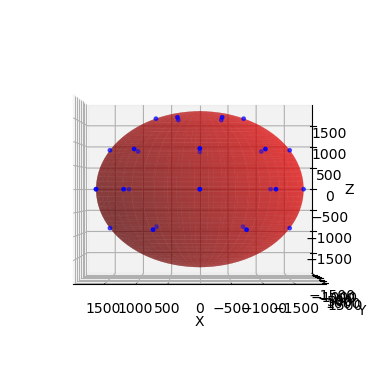

[ -734.51053891  -367.25526945 -1505.15215178  -752.57607589]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Radius of the Moon in Km
r = 1738

# Number of images used
img_num = 29

# Array to contain the Lon and Lat of the top left corner of each image
long_lat_array = np.zeros([img_num,2])
# Array to contain the change in Lon and Lat going from top left to bottom right of each image 
delta_long_lat = np.zeros([img_num,2])

# Code has to be split like this as some images had different dimensions, for images 0-5 and 22-27 the change in long and lat going from,
#, top left to bottom right of image was (60,-35) whereas for images 6-21 this change was (45,-30)

# Images were taken from website that split the moon into a grid with four rows hence the four different parts of the loop 
# Rows 1 and 4 were split into 6 images hence the range of their corresponding loop being 6, rows 2 and 3 were split into 8 images hence,
#, their corresponding loops being 8 in length 

for i in range(img_num):
    if i < 6:
        long_lat_array[i,0] = -180 + (60*i) 
        long_lat_array[i,1] = 65
        
        delta_long_lat[i,0] = 60
        delta_long_lat[i,1] = -35
        
    if 6 <= i < 14:
        long_lat_array[i,0] = -180 + (45*(i-6))
        long_lat_array[i,1] = 30

        delta_long_lat[i,0] = 45
        delta_long_lat[i,1] = -30
    
    if 14 <= i < 22:
        long_lat_array[i,0] = -180 + (45*(i-14))
        long_lat_array[i,1] = 0

        delta_long_lat[i,0] = 45
        delta_long_lat[i,1] = -30
    
    if 22 <= i < 28:
        long_lat_array[i,0] = -180 + (60*(i-22))
        long_lat_array[i,1] = -30

        delta_long_lat[i,0] = 60
        delta_long_lat[i,1] = -35

# Array to contain the long and latitudes of all the corners of every image
rect_MC = np.zeros([img_num,4,2])

for i in range(29):
    rect_MC[i,0] = long_lat_array[i] 
    
    rect_MC[i,1,0] = long_lat_array[i,0] + delta_long_lat[i,0]
    rect_MC[i,1,1] = long_lat_array[i,1]

    rect_MC[i,2,0] = long_lat_array[i,0] 
    rect_MC[i,2,1] = long_lat_array[i,1] + delta_long_lat[i,1]

    rect_MC[i,3,0] = long_lat_array[i,0] + delta_long_lat[i,0]
    rect_MC[i,3,1] = long_lat_array[i,1] + delta_long_lat[i,1]


# Convert from degrees to radians to use in np functions
longitudes = np.radians(long_lat_array[:, 0])
latitudes = np.radians(long_lat_array[:, 1])

longitudes1 = np.radians(rect_MC[:,:, 0])
latitudes1 = np.radians(rect_MC[:,:, 1])



# Convert long and lat to cartesian coordinates

# Gives 3D coordinates for the location of the top left corner (TLC) for every image
x = r * np.cos(latitudes) * np.cos(longitudes)
y = r * np.cos(latitudes) * np.sin(longitudes)
z = r * np.sin(latitudes)

# Gives 3D coordinates for the location of all 4 corners for every image
x1 = r * np.cos(latitudes1) * np.cos(longitudes1)
y1 = r * np.cos(latitudes1) * np.sin(longitudes1)
z1 = r * np.sin(latitudes1)
print(x.shape)
print(x1.shape)

Rectangle_corners = np.zeros([img_num,4,3])
for i in range(29):
    for j in range(4):
            Rectangle_corners[i,j,0] = np.round(x1[i,j],3)
            Rectangle_corners[i,j,1] = np.round(y1[i,j],3)
            Rectangle_corners[i,j,2] = np.round(z1[i,j],3)





# Draws the surface of the moon
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = r * np.outer(np.cos(u), np.sin(v))
y_sphere = r * np.outer(np.sin(u), np.sin(v))
z_sphere = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Plotting the locations of the TLC for every image onto the sphere
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, color='b', s=6)  # Plot points
ax1.view_init(elev=0., azim=90)

ax1.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.5)

# Labeling the plot
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

plt.show()


In [45]:
!pip install plotly


In [62]:
import plotly.graph_objects as go

# Plot points onto sphere
scatter = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2, color='black'))

surface = go.Surface(x=x_sphere, y=y_sphere, z=z_sphere, opacity=0.1)
axlim = 2000 

# Plotting the 'rectangles' corresponding to each image 
rectangles = []
for f in range(29): 
    # Create a 3D Mesh for each image 'rectangle' 
    rectangle = go.Mesh3d(
        x=x1[f],
        y=y1[f],
        z=z1[f],
        color='blue',
        opacity=0.8,
        flatshading=True
    )
    rectangles.append(rectangle)

# Combine everything into a single figure
fig = go.Figure(data=[scatter, surface] + rectangles)
fig.update_layout(scene=dict(
                    xaxis=dict(nticks=4, range=[-axlim, axlim]), # Stops the axis from being crowded with numbers and becoming unclear
                    yaxis=dict(nticks=4, range=[-axlim, axlim]),
                    zaxis=dict(nticks=4, range=[-axlim, axlim]),
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'))
fig.show()
